In [1]:
#pip install lazypredict

In [2]:
import numpy as np 
import pandas as pd 
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression   
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier   
from sklearn.ensemble import RandomForestClassifier   
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
#from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-academic-success/submission.csv
/kaggle/input/student-academic-success/train.csv
/kaggle/input/student-academic-success/metadata.csv
/kaggle/input/student-academic-success/test.csv


In [4]:
data = pd.read_csv("/kaggle/input/student-academic-success/train.csv",sep=';')

In [5]:
data = data.rename(columns={data.columns[0]: 'Martial Status'})
data = data.rename(columns={data.columns[4]: 'Daytime/evening attendance'})

In [6]:
data

,Martial Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,1,51,1,9991,0,39,120.0,1,1,4,...,9,13,13,9,11.333333,0,8.9,1.4,3.51,Dropout
3536,1,39,1,9991,0,1,110.0,1,37,37,...,0,5,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
3537,1,39,2,9147,1,19,133.1,1,38,19,...,0,5,9,0,0.000000,0,10.8,1.4,1.74,Dropout
3538,1,17,5,9254,1,1,118.0,1,19,37,...,0,6,12,4,10.250000,0,7.6,2.6,0.32,Dropout


In [7]:
meta = pd.read_csv("/kaggle/input/student-academic-success/metadata.csv", sep=';')

In [8]:
meta

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,NaN,no
1,Application mode,Feature,Integer,NaN,1 - 1st phase - general contingent 2 - Ordinan...,NaN,no
2,Application order,Feature,Integer,NaN,Application order (between 0 - first choice; a...,NaN,no
3,Course,Feature,Integer,NaN,33 - Biofuel Production Technologies 171 - Ani...,NaN,no
4,Daytime/evening attendance,Feature,Integer,NaN,1 – daytime 0 - evening,NaN,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,NaN,no
6,Previous qualification (grade),Feature,Continuous,NaN,Grade of previous qualification (between 0 and...,NaN,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,NaN,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no


In [9]:
data['Martial Status'].unique()

array([1, 2, 4, 3, 5, 6])

In [10]:
meta[['Description']].iloc[-1,0]

'Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course'

**Dropout --> leaving the higher education system without a degree <br>**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Martial Status                                  3540 non-null   int64  
 1   Application mode                                3540 non-null   int64  
 2   Application order                               3540 non-null   int64  
 3   Course                                          3540 non-null   int64  
 4   Daytime/evening attendance                      3540 non-null   int64  
 5   Previous qualification                          3540 non-null   int64  
 6   Previous qualification (grade)                  3540 non-null   float64
 7   Nacionality                                     3540 non-null   int64  
 8   Mother's qualification                          3540 non-null   int64  
 9   Father's qualification                   

In [12]:
data.isna().any()

Martial Status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [13]:
data.head()

,Martial Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [14]:
data[['Previous qualification','Previous qualification (grade)']]

,Previous qualification,Previous qualification (grade)
0,1,122.0
1,1,160.0
2,1,122.0
3,1,122.0
4,1,100.0
...,...,...
3535,39,120.0
3536,1,110.0
3537,19,133.1
3538,1,118.0


In [15]:
data['Previous qualification'].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5])

In [16]:
meta.iloc[5,4]

"1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)"

In [17]:
education_string = "1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)"
pattern = re.compile(r'(\d+) - (.+?)(?=\s\d|$)')
matches = pattern.findall(education_string)

education_dict = {int(code): description for code, description in matches}

Prev_qual_df = pd.DataFrame(list(education_dict.items()), columns=['Code', 'Education Level'])


In [18]:
Prev_qual_df

,Code,Education Level
0,1,Secondary education
1,2,Higher education - bachelor's degree
2,3,Higher education - degree
3,4,Higher education - master's
4,5,Higher education - doctorate
5,6,Frequency of higher education
6,9,12th year of schooling - not completed
7,10,11th year of schooling - not completed
8,12,Other -
9,14,10th year of schooling


In [19]:
vals = data[['Previous qualification']].value_counts().to_frame().reset_index()

In [20]:
vals.sort_values(by='Previous qualification')

,Previous qualification,count
0,1,2985
7,2,16
3,3,104
10,4,7
15,5,1
8,6,12
9,9,10
13,10,3
4,12,34
14,15,2


**The 1 (Secondary education) previous qualification is the most frequent one (2985 from total 3540) in training data by a huge difference.**

In [21]:
meta.iloc[6,4]

'Grade of previous qualification (between 0 and 200)'

In [22]:
data['Daytime/evening attendance'].value_counts(normalize=True)

Daytime/evening attendance
1    0.889831
0    0.110169
Name: proportion, dtype: float64

In [23]:
data.Nacionality.unique()

array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105])

In [24]:
data.Nacionality.value_counts()

Nacionality
1      3453
41       30
6        12
26       12
22       10
24        3
11        3
62        2
100       2
101       2
21        2
103       2
25        1
32        1
13        1
109       1
2         1
108       1
105       1
Name: count, dtype: int64

In [25]:
data['Mother\'s occupation'].value_counts(normalize=True)

Mother's occupation
9      0.352260
4      0.187288
5      0.117797
3      0.081921
2      0.074011
7      0.059322
0      0.033051
1      0.022599
6      0.021751
90     0.016667
8      0.008192
191    0.006497
99     0.002825
194    0.002825
141    0.001412
175    0.001412
192    0.001412
123    0.001412
134    0.001130
143    0.000847
144    0.000847
132    0.000847
10     0.000847
151    0.000565
152    0.000282
173    0.000282
193    0.000282
122    0.000282
125    0.000282
131    0.000282
171    0.000282
153    0.000282
Name: proportion, dtype: float64

In [26]:
meta.iloc[10,4]

'0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and 

<Axes: xlabel='Martial Status', ylabel='count'>

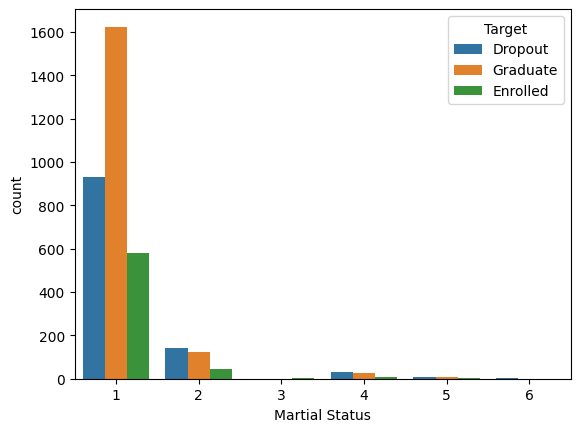

In [27]:
sns.countplot(x='Martial Status', hue='Target', data=data)

<Axes: xlabel='Daytime/evening attendance', ylabel='count'>

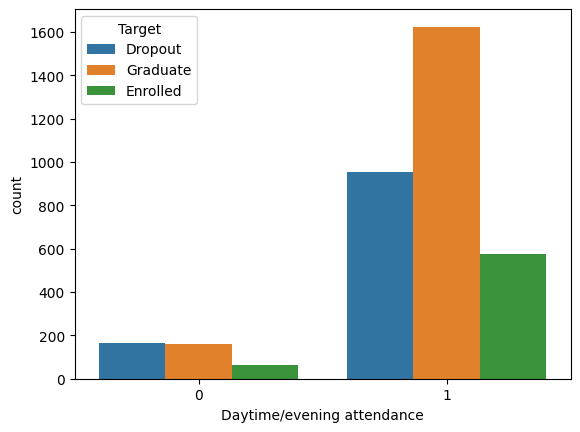

In [28]:
sns.countplot(x='Daytime/evening attendance', hue='Target', data=data)

In [29]:
all_columns = data.columns
all_columns = all_columns.delete([6,12,33,34,35,36])
len(all_columns)

31

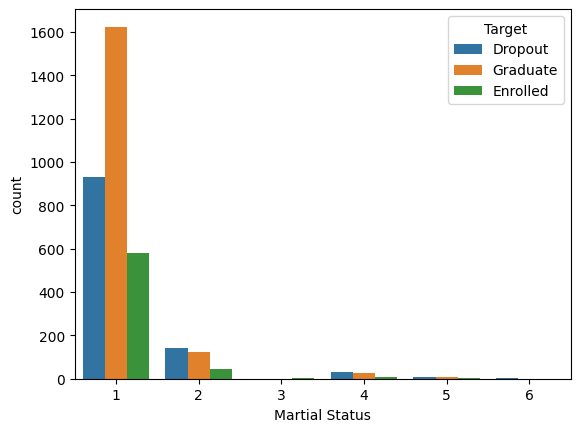

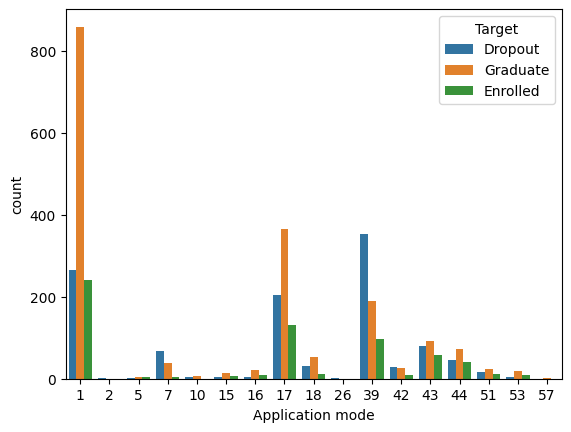

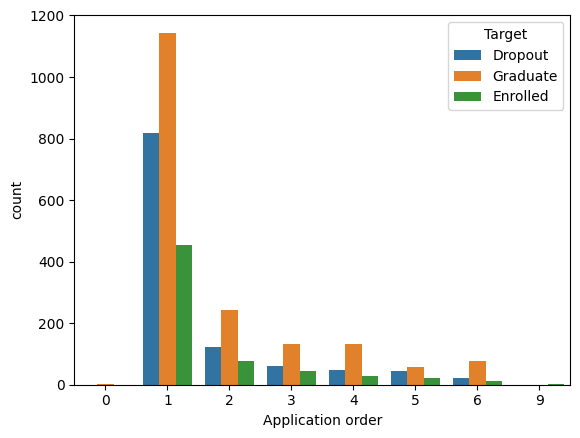

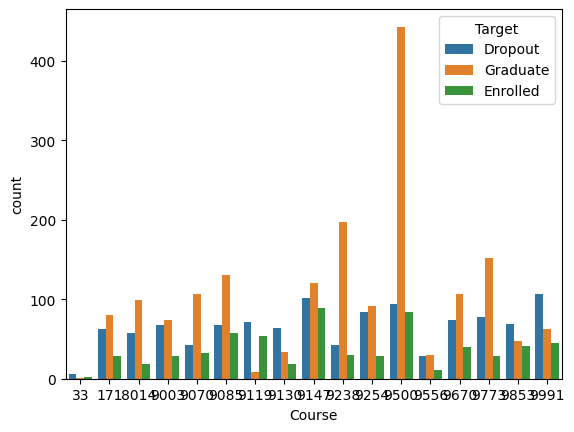

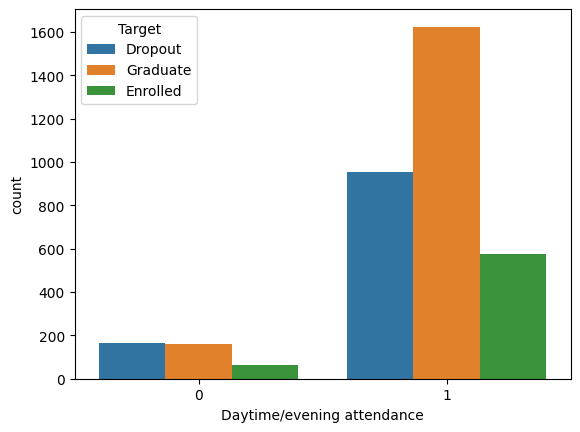

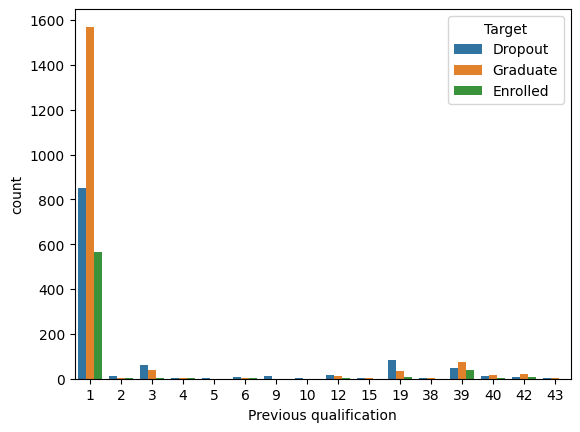

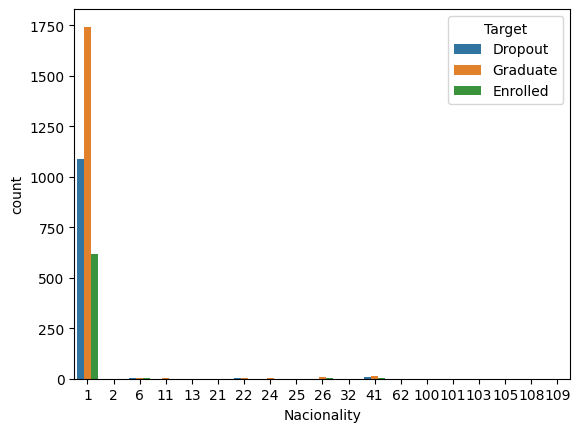

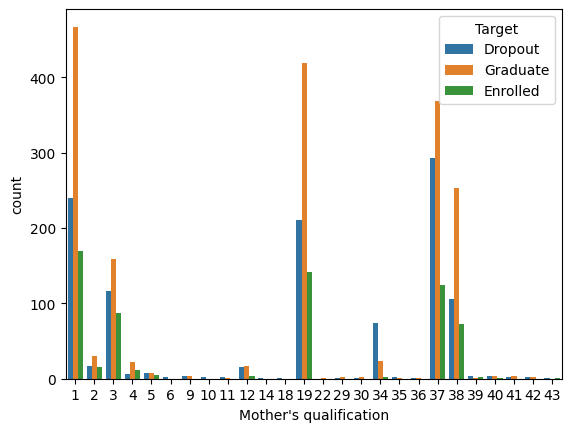

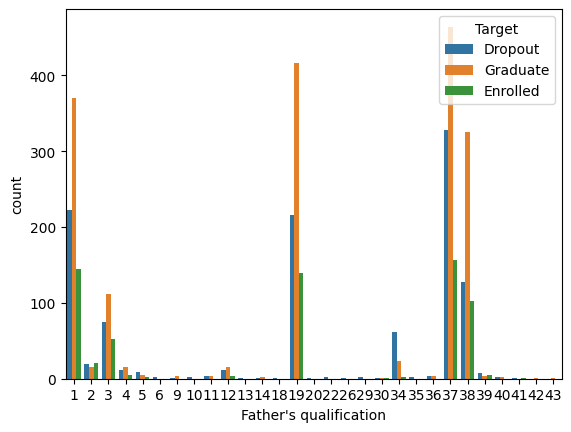

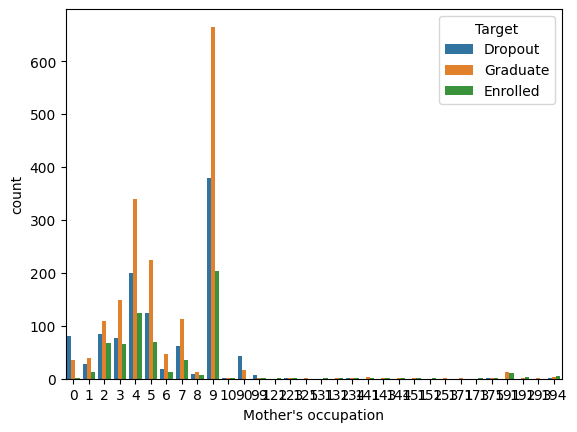

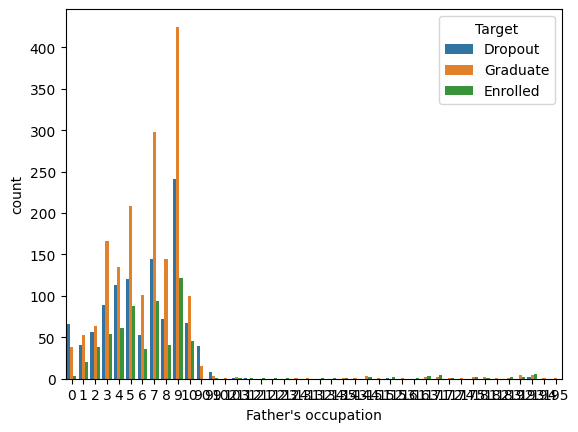

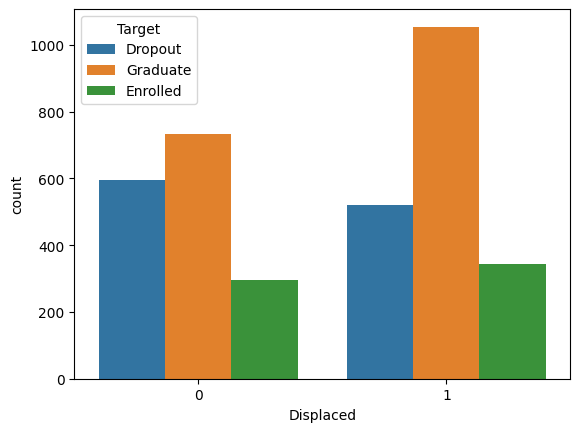

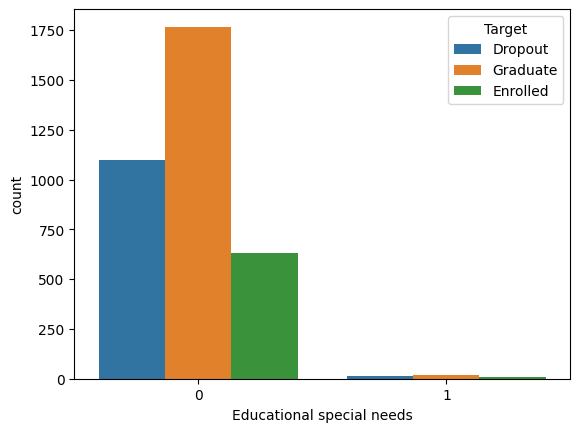

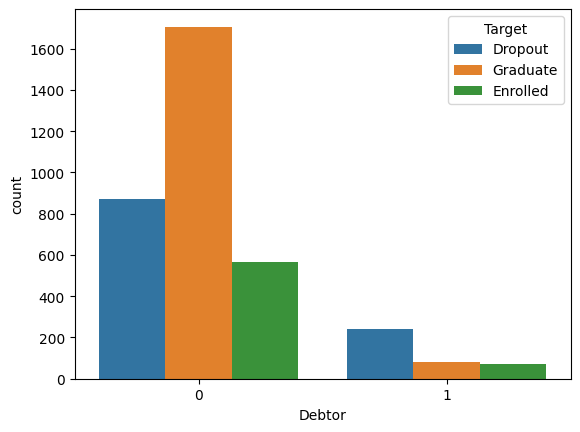

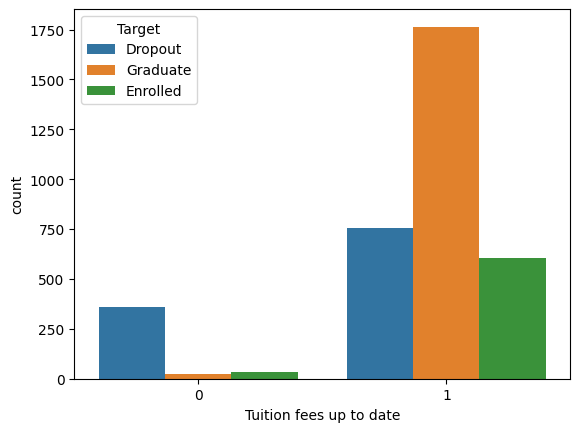

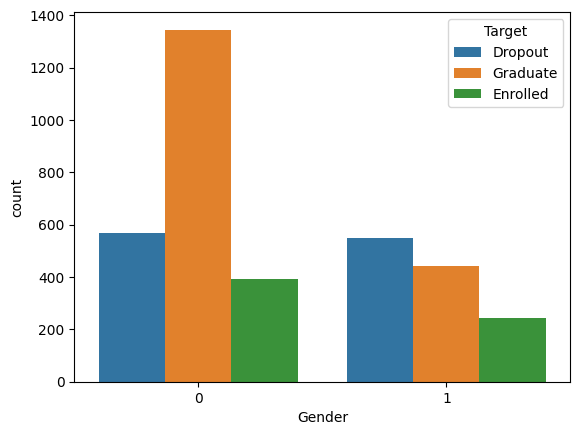

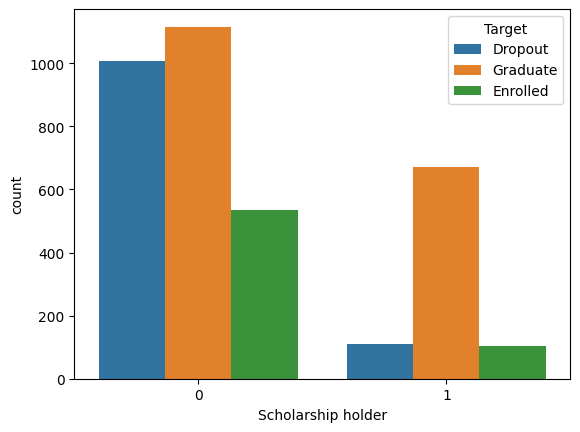

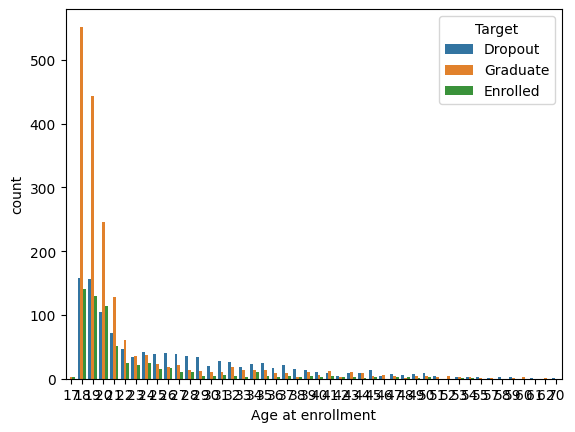

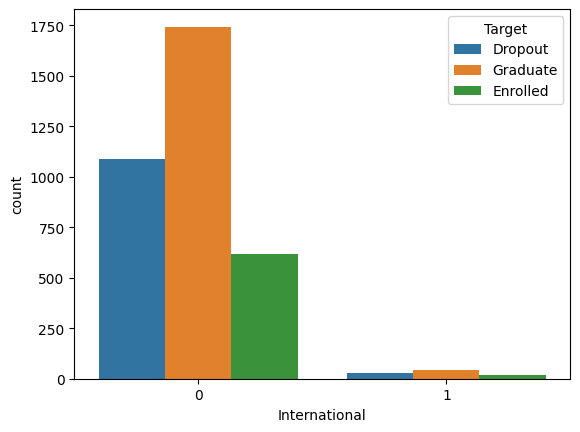

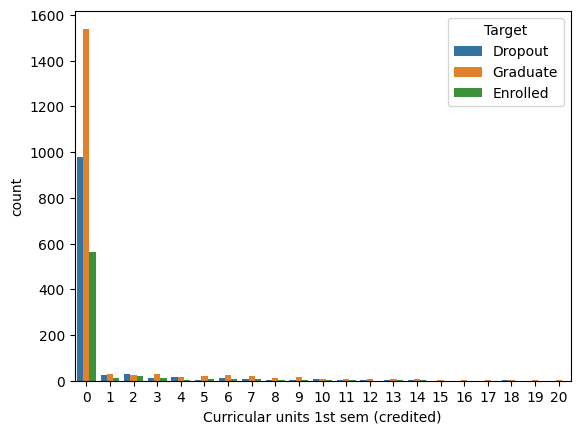

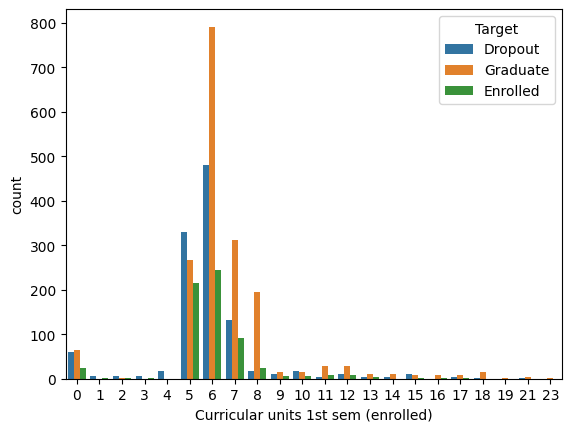

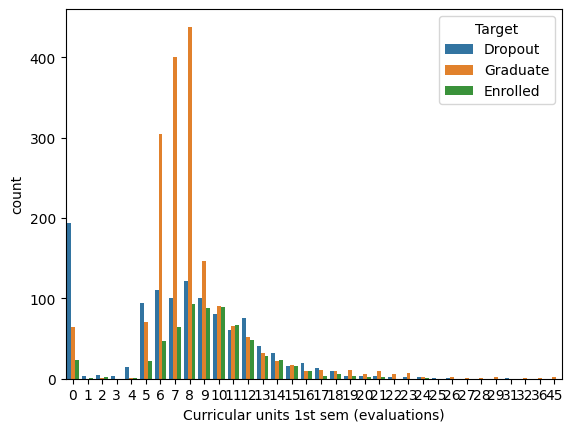

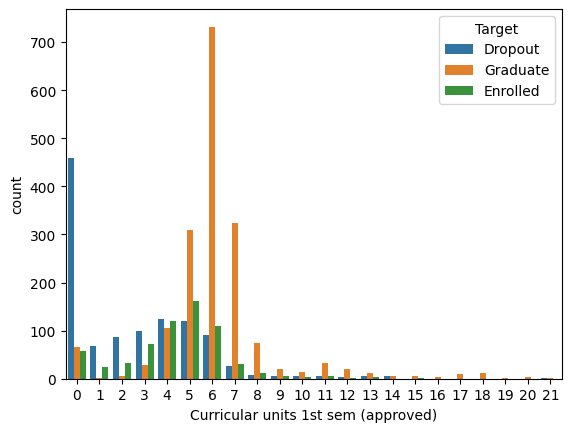

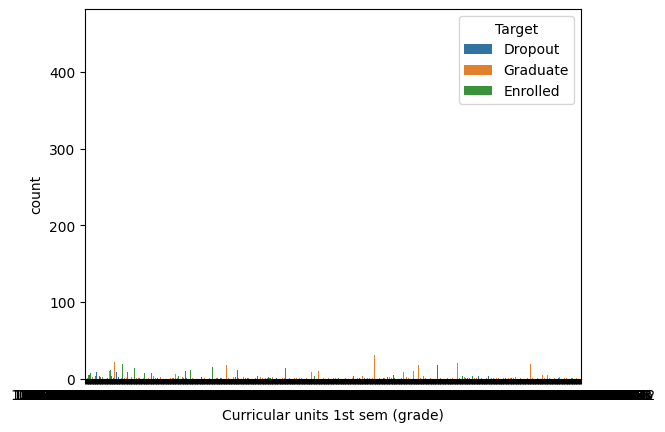

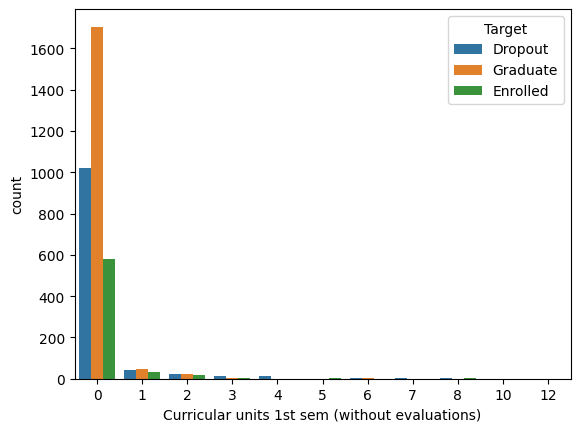

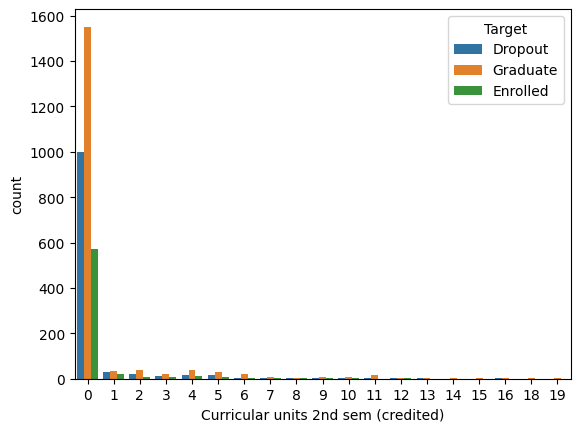

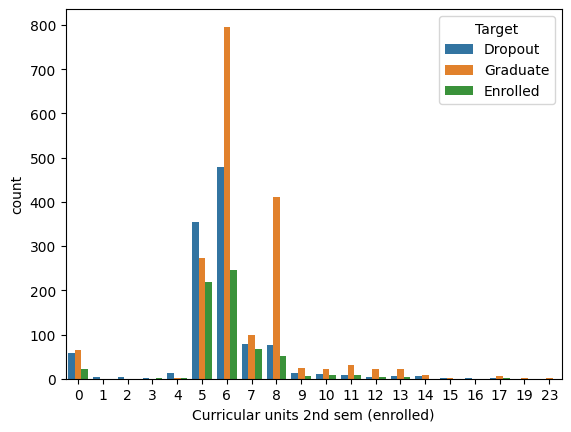

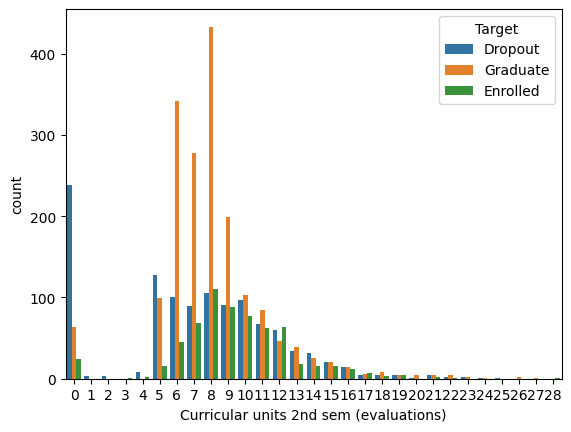

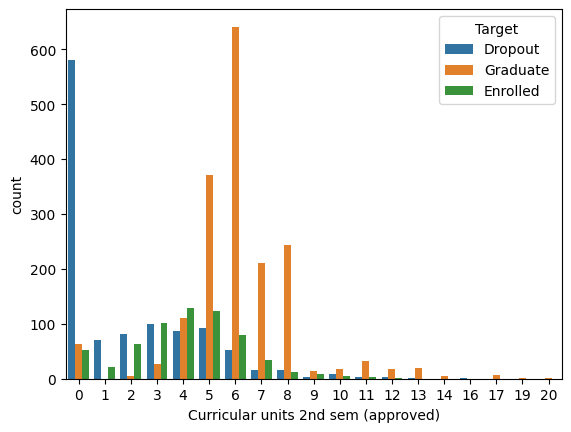

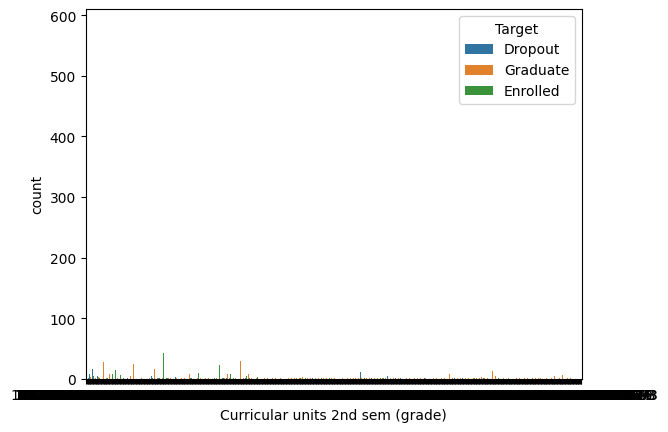

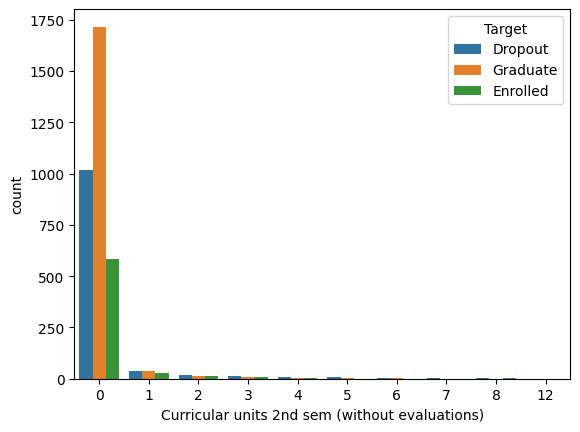

In [30]:
for column in all_columns[0:]:
    sns.countplot(x=column, hue='Target', data=data)
    plt.show()

In [31]:
data[['Martial Status', 'Target']].groupby(['Martial Status','Target'])['Target'].count().to_frame()

Target
Martial Status Target          
1              Dropout      932
               Enrolled     579
               Graduate    1624
2              Dropout      143
               Enrolled      44
               Graduate     125
3              Dropout        1
               Enrolled       2
               Graduate       1
4              Dropout       30
               Enrolled      10
               Graduate      27
5              Dropout        6
               Enrolled       2
               Graduate       8
6              Dropout        4
               Enrolled       1
               Graduate       1

In [32]:
pivot_table = data.pivot_table(index='Martial Status', columns='Target', aggfunc='size', fill_value=0)
pivot_table[pivot_table['Dropout']>pivot_table['Graduate']]

Target,Dropout,Enrolled,Graduate
Martial Status,,,
2,143,44,125
4,30,10,27
6,4,1,1


In [33]:
print(pivot_table[pivot_table['Dropout']>pivot_table['Graduate']].index)

Index([2, 4, 6], dtype='int64', name='Martial Status')


In [34]:
for column in all_columns[0:]:
    pivot_table = data.pivot_table(index=column, columns='Target', aggfunc='size', fill_value=0)
    print(f"{column} in which dropouts > graduates: \n")
    print(pivot_table[pivot_table['Dropout']>pivot_table['Graduate']].index)
    print("------------------------------------------------------------------------------------")

Martial Status in which dropouts > graduates: 

Index([2, 4, 6], dtype='int64', name='Martial Status')
------------------------------------------------------------------------------------
Application mode in which dropouts > graduates: 

Index([2, 7, 26, 39, 42], dtype='int64', name='Application mode')
------------------------------------------------------------------------------------
Application order in which dropouts > graduates: 

Index([], dtype='int64', name='Application order')
------------------------------------------------------------------------------------
Course in which dropouts > graduates: 

Index([33, 9119, 9130, 9853, 9991], dtype='int64', name='Course')
------------------------------------------------------------------------------------
Daytime/evening attendance in which dropouts > graduates: 

Index([0], dtype='int64', name='Daytime/evening attendance')
------------------------------------------------------------------------------------
Previous qualification in w

In [35]:
data.describe()

,Martial Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,...,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,1.173729,18.673729,1.732486,8858.282768,0.889831,4.483898,132.445621,1.853107,19.180226,21.976836,...,0.140678,0.531921,6.216384,7.998023,4.444068,10.218415,0.151977,11.607006,1.210028,0.006850
std,0.589576,17.488737,1.317140,2060.697591,0.313145,10.101101,13.232719,6.802913,15.567580,15.402595,...,0.698350,1.888933,2.172567,3.908569,3.009541,5.213759,0.760764,2.663956,1.379466,2.268117
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.000000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.343125,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,43.000000,43.000000,...,12.000000,19.000000,23.000000,28.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [36]:
demographic_data = data[['Martial Status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment','International']]
socioeconomics_data = data[['Father\'s qualification','Mother\'s qualification','Father\'s occupation','Mother\'s occupation','Educational special needs','Debtor','Tuition fees up to date','Scholarship holder']]
macroeconomics_data = data[['Unemployment rate','Inflation rate','GDP']]
academicAtEnrollment_data = data[['Application mode','Application order','Course','Daytime/evening attendance','Previous qualification']]
academicAtFirstSemEnd_data = data[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)']]
academicAtSecSemEnd_data = data[['Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']]
target_data = data[['Target']]

In [37]:
demographic_data.head()

,Martial Status,Nacionality,Displaced,Gender,Age at enrollment,International
0,1,1,1,1,20,0
1,1,1,1,1,19,0
2,1,1,1,1,19,0
3,1,1,1,0,20,0
4,2,1,0,0,45,0


**The feature 'Displaced' refers to whether a student has been displaced from their usual or permanent residence.**

In [38]:
meta.iloc[1,4]

'1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)'

In [39]:
meta.iloc[2,4]

'Application order (between 0 - first choice; and 9 last choice)'

**The "application order" refers to the order in which students applied for enrollment.**

***(Students > 23 years old) && (Students with other higher courses) are more likely to dropout.***

In [40]:
academicAtEnrollment_dataWithTarget = academicAtEnrollment_data
academicAtEnrollment_dataWithTarget['Target'] = target_data['Target']

In [41]:
academicAtEnrollment_dataWithTarget

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Target
0,17,5,171,1,1,Dropout
1,15,1,9254,1,1,Graduate
2,1,5,9070,1,1,Dropout
3,17,2,9773,1,1,Graduate
4,39,1,8014,0,1,Graduate
...,...,...,...,...,...,...
3535,51,1,9991,0,39,Dropout
3536,39,1,9991,0,1,Dropout
3537,39,2,9147,1,19,Dropout
3538,17,5,9254,1,1,Dropout


In [42]:
count_df = academicAtEnrollment_dataWithTarget.groupby(['Course','Target'])['Target'].count().to_frame(name='count').reset_index()
total_counts = academicAtEnrollment_dataWithTarget.groupby('Course')['Target'].count().reset_index(name='Total_Count')

In [43]:
count_df.head()

,Course,Target,count
0,33,Dropout,6
1,33,Enrolled,2
2,33,Graduate,1
3,171,Dropout,63
4,171,Enrolled,29


In [44]:
total_counts.head()

,Course,Total_Count
0,33,9
1,171,172
2,8014,176
3,9003,169
4,9070,181


In [45]:
result_df = pd.merge(count_df, total_counts, on='Course')
result_df.head()

,Course,Target,count,Total_Count
0,33,Dropout,6,9
1,33,Enrolled,2,9
2,33,Graduate,1,9
3,171,Dropout,63,172
4,171,Enrolled,29,172


In [46]:
result_df['Count_Ratio'] = result_df['count'] / result_df['Total_Count']
result_df.head()

,Course,Target,count,Total_Count,Count_Ratio
0,33,Dropout,6,9,0.666667
1,33,Enrolled,2,9,0.222222
2,33,Graduate,1,9,0.111111
3,171,Dropout,63,172,0.366279
4,171,Enrolled,29,172,0.168605


<Axes: xlabel='Course', ylabel='Count_Ratio'>

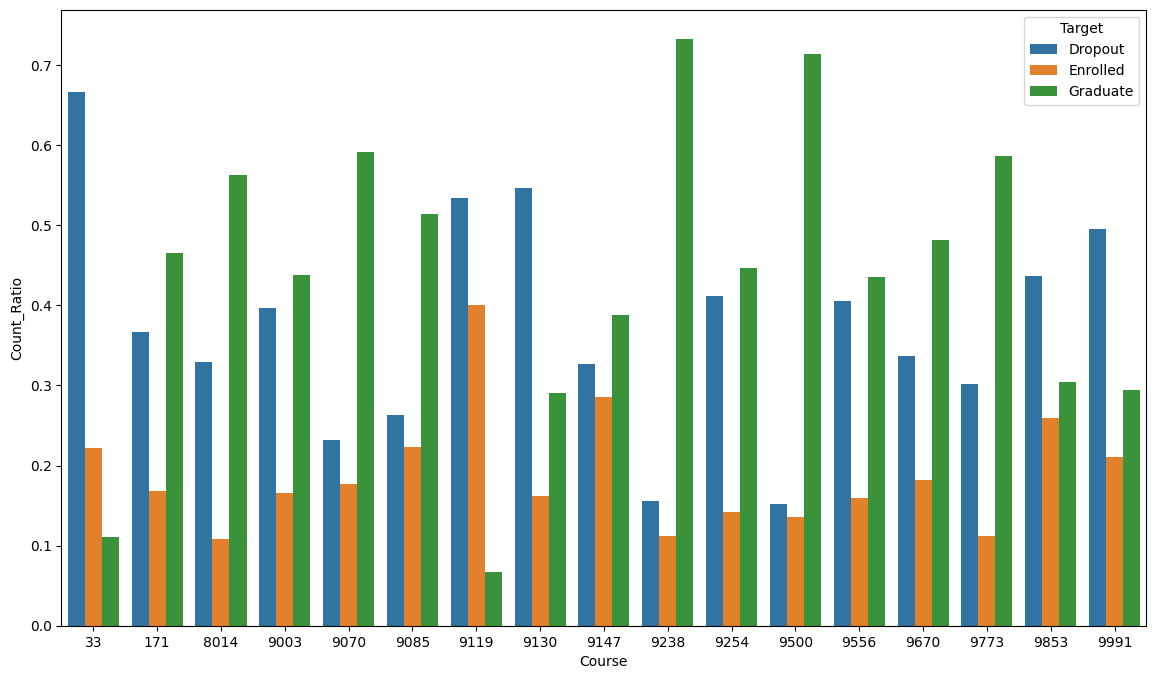

In [47]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Course', y='Count_Ratio', hue='Target', data=result_df)

In [48]:
result_df[(result_df.Course == 33) | (result_df.Course == 9119) | (result_df.Course == 9130) | (result_df.Course == 9853) | (result_df.Course == 9991)]

,Course,Target,count,Total_Count,Count_Ratio
0,33,Dropout,6,9,0.666667
1,33,Enrolled,2,9,0.222222
2,33,Graduate,1,9,0.111111
18,9119,Dropout,72,135,0.533333
19,9119,Enrolled,54,135,0.400000
20,9119,Graduate,9,135,0.066667
21,9130,Dropout,64,117,0.547009
22,9130,Enrolled,19,117,0.162393
23,9130,Graduate,34,117,0.290598
45,9853,Dropout,69,158,0.436709


In [49]:
meta.iloc[3,4]

'33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)'

**The Biofuel Production Technologies & Informatics Engineering have the worst results among courses.**

**Students attending during the daytime are more likely to complete the course, as well as students who was displaced from their residences.**

### Encoding The Target

In [50]:
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

In [51]:
data.head()

,Martial Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [52]:
corr_matrix = data.corr()

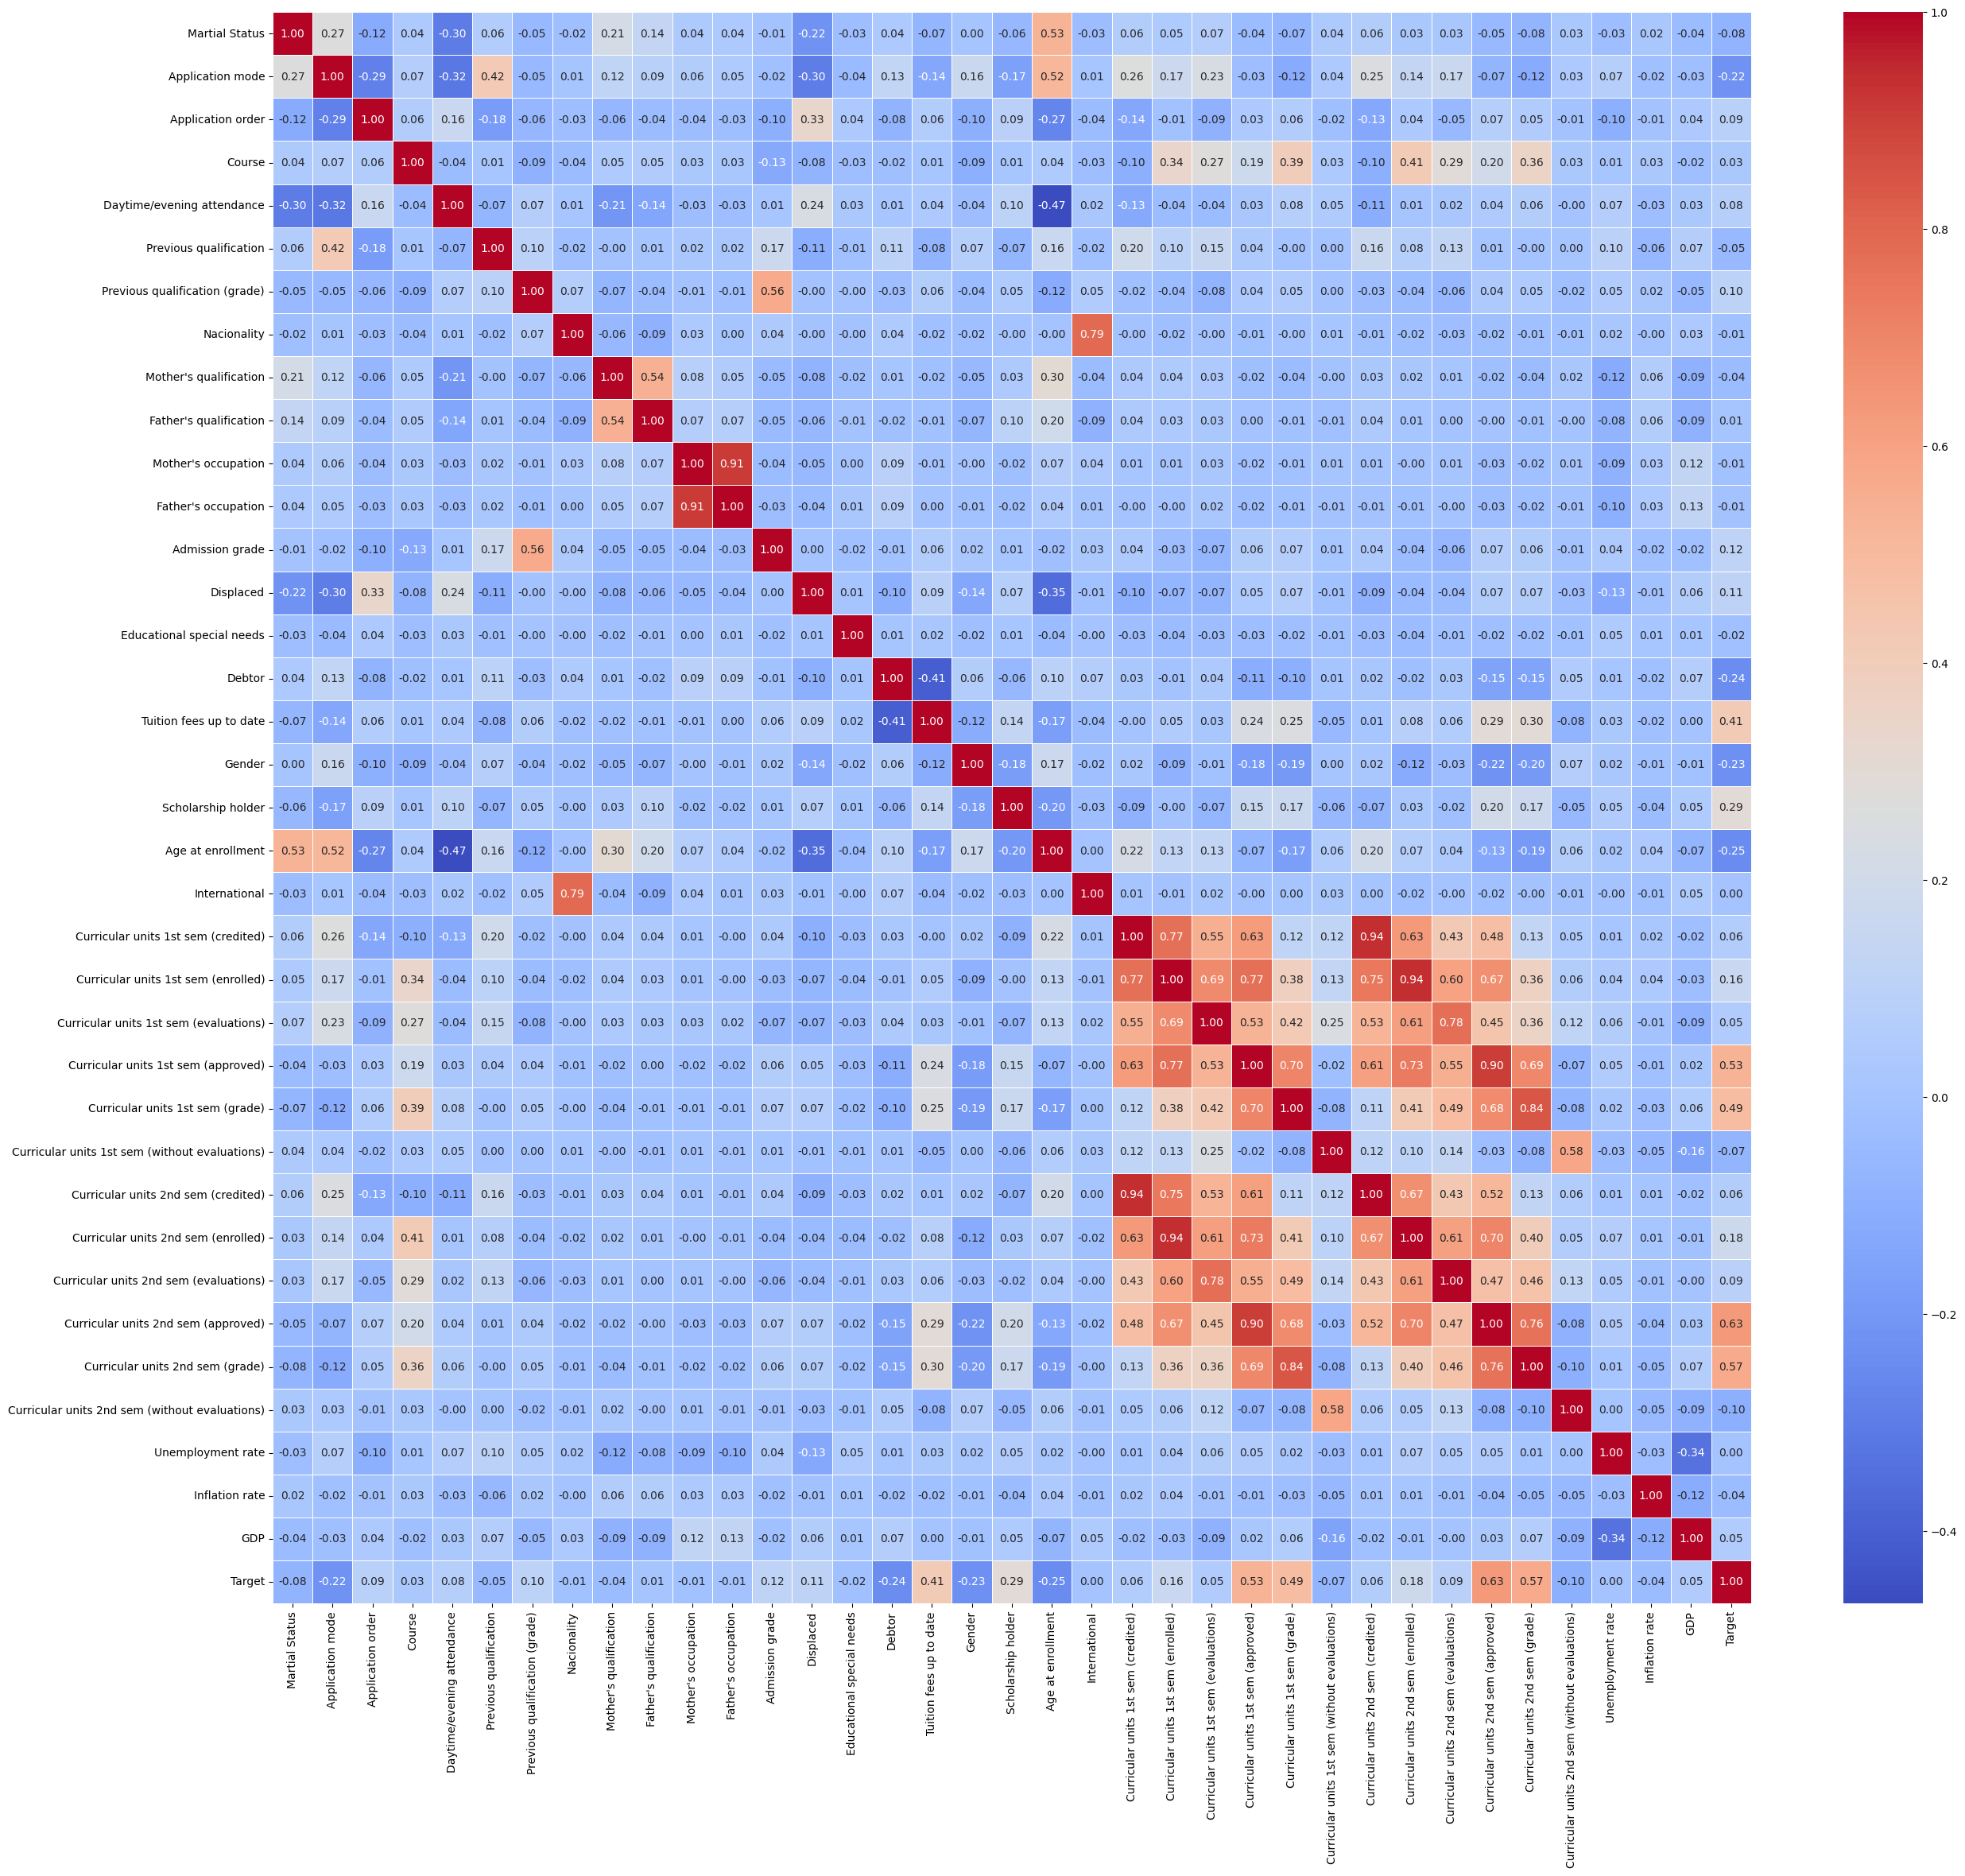

In [53]:
plt.figure(figsize=(30, 26))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [54]:
threshold = 0.5
selected_columns = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold and abs(corr_value) < 1.0:
            selected_columns.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

print("Column pairs with correlation < -0.5 and > 0.5:")
for col_pair in selected_columns:
    print(col_pair)

Column pairs with correlation < -0.5 and > 0.5:
('Martial Status', 'Age at enrollment', 0.5327718783556608)
('Application mode', 'Age at enrollment', 0.5176861376741212)
('Previous qualification (grade)', 'Admission grade', 0.5646933890243779)
('Nacionality', 'International', 0.7901485499674328)
("Mother's qualification", "Father's qualification", 0.5424896335400842)
("Mother's occupation", "Father's occupation", 0.9109506747802071)
('Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 0.7682760603141547)
('Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 0.5486411082812669)
('Curricular units 1st sem (credited)', 'Curricular units 1st sem (approved)', 0.6251271484819427)
('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 0.9402776030371532)
('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (enrolled)', 0.6315193710678959)
('Curricular units 1st sem (enrolled)', 'Curricular units 1st sem

In [55]:
selected_columns = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.7 and abs(corr_value) < 1.0:
            selected_columns.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

print("Column pairs with correlation < -0.7 and > 0.7:")
for col_pair in selected_columns:
    print(col_pair)

Column pairs with correlation < -0.7 and > 0.7:
('Nacionality', 'International', 0.7901485499674328)
("Mother's occupation", "Father's occupation", 0.9109506747802071)
('Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 0.7682760603141547)
('Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 0.9402776030371532)
('Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 0.7689765637267562)
('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (credited)', 0.7473576379818423)
('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)', 0.9384480155420204)
('Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)', 0.7760661555534931)
('Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 0.7023707870758812)
('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 0.7312886153420528)
('Curricular units 1st sem (approved)

### drop unimportant features

In [56]:
data[data.columns[1:]].corr()['Target'][:-1]

Application mode                                 -0.223624
Application order                                 0.085090
Course                                            0.028348
Daytime/evening attendance                        0.077253
Previous qualification                           -0.049508
Previous qualification (grade)                    0.102547
Nacionality                                      -0.012926
Mother's qualification                           -0.039636
Father's qualification                            0.005501
Mother's occupation                              -0.008425
Father's occupation                              -0.007064
Admission grade                                   0.117361
Displaced                                         0.108849
Educational special needs                        -0.015342
Debtor                                           -0.240852
Tuition fees up to date                           0.412627
Gender                                           -0.2280

In [57]:
data = data.drop(columns=["Unemployment rate","International","Father's occupation","Mother's occupation","Mother's qualification","Father's qualification"])

### checking if the data is balanced

In [58]:
data["Target"].value_counts()

Target
2    1786
0    1116
1     638
Name: count, dtype: int64

### balancing the data using technique:
#### Synthetic Minority Oversampling (SMOTE)

In [59]:
X = data.drop(["Target"], axis=1)
y = data["Target"]

In [60]:
smote_sampler = SMOTE(random_state=42)
X_smote, y_smote = smote_sampler.fit_resample(X, y)
smote_data = pd.concat([X_smote, y_smote], axis=1)
smote_data.shape

(5358, 31)

In [61]:
smote_data["Target"].value_counts()

Target
0    1786
2    1786
1    1786
Name: count, dtype: int64

### Data Transformation

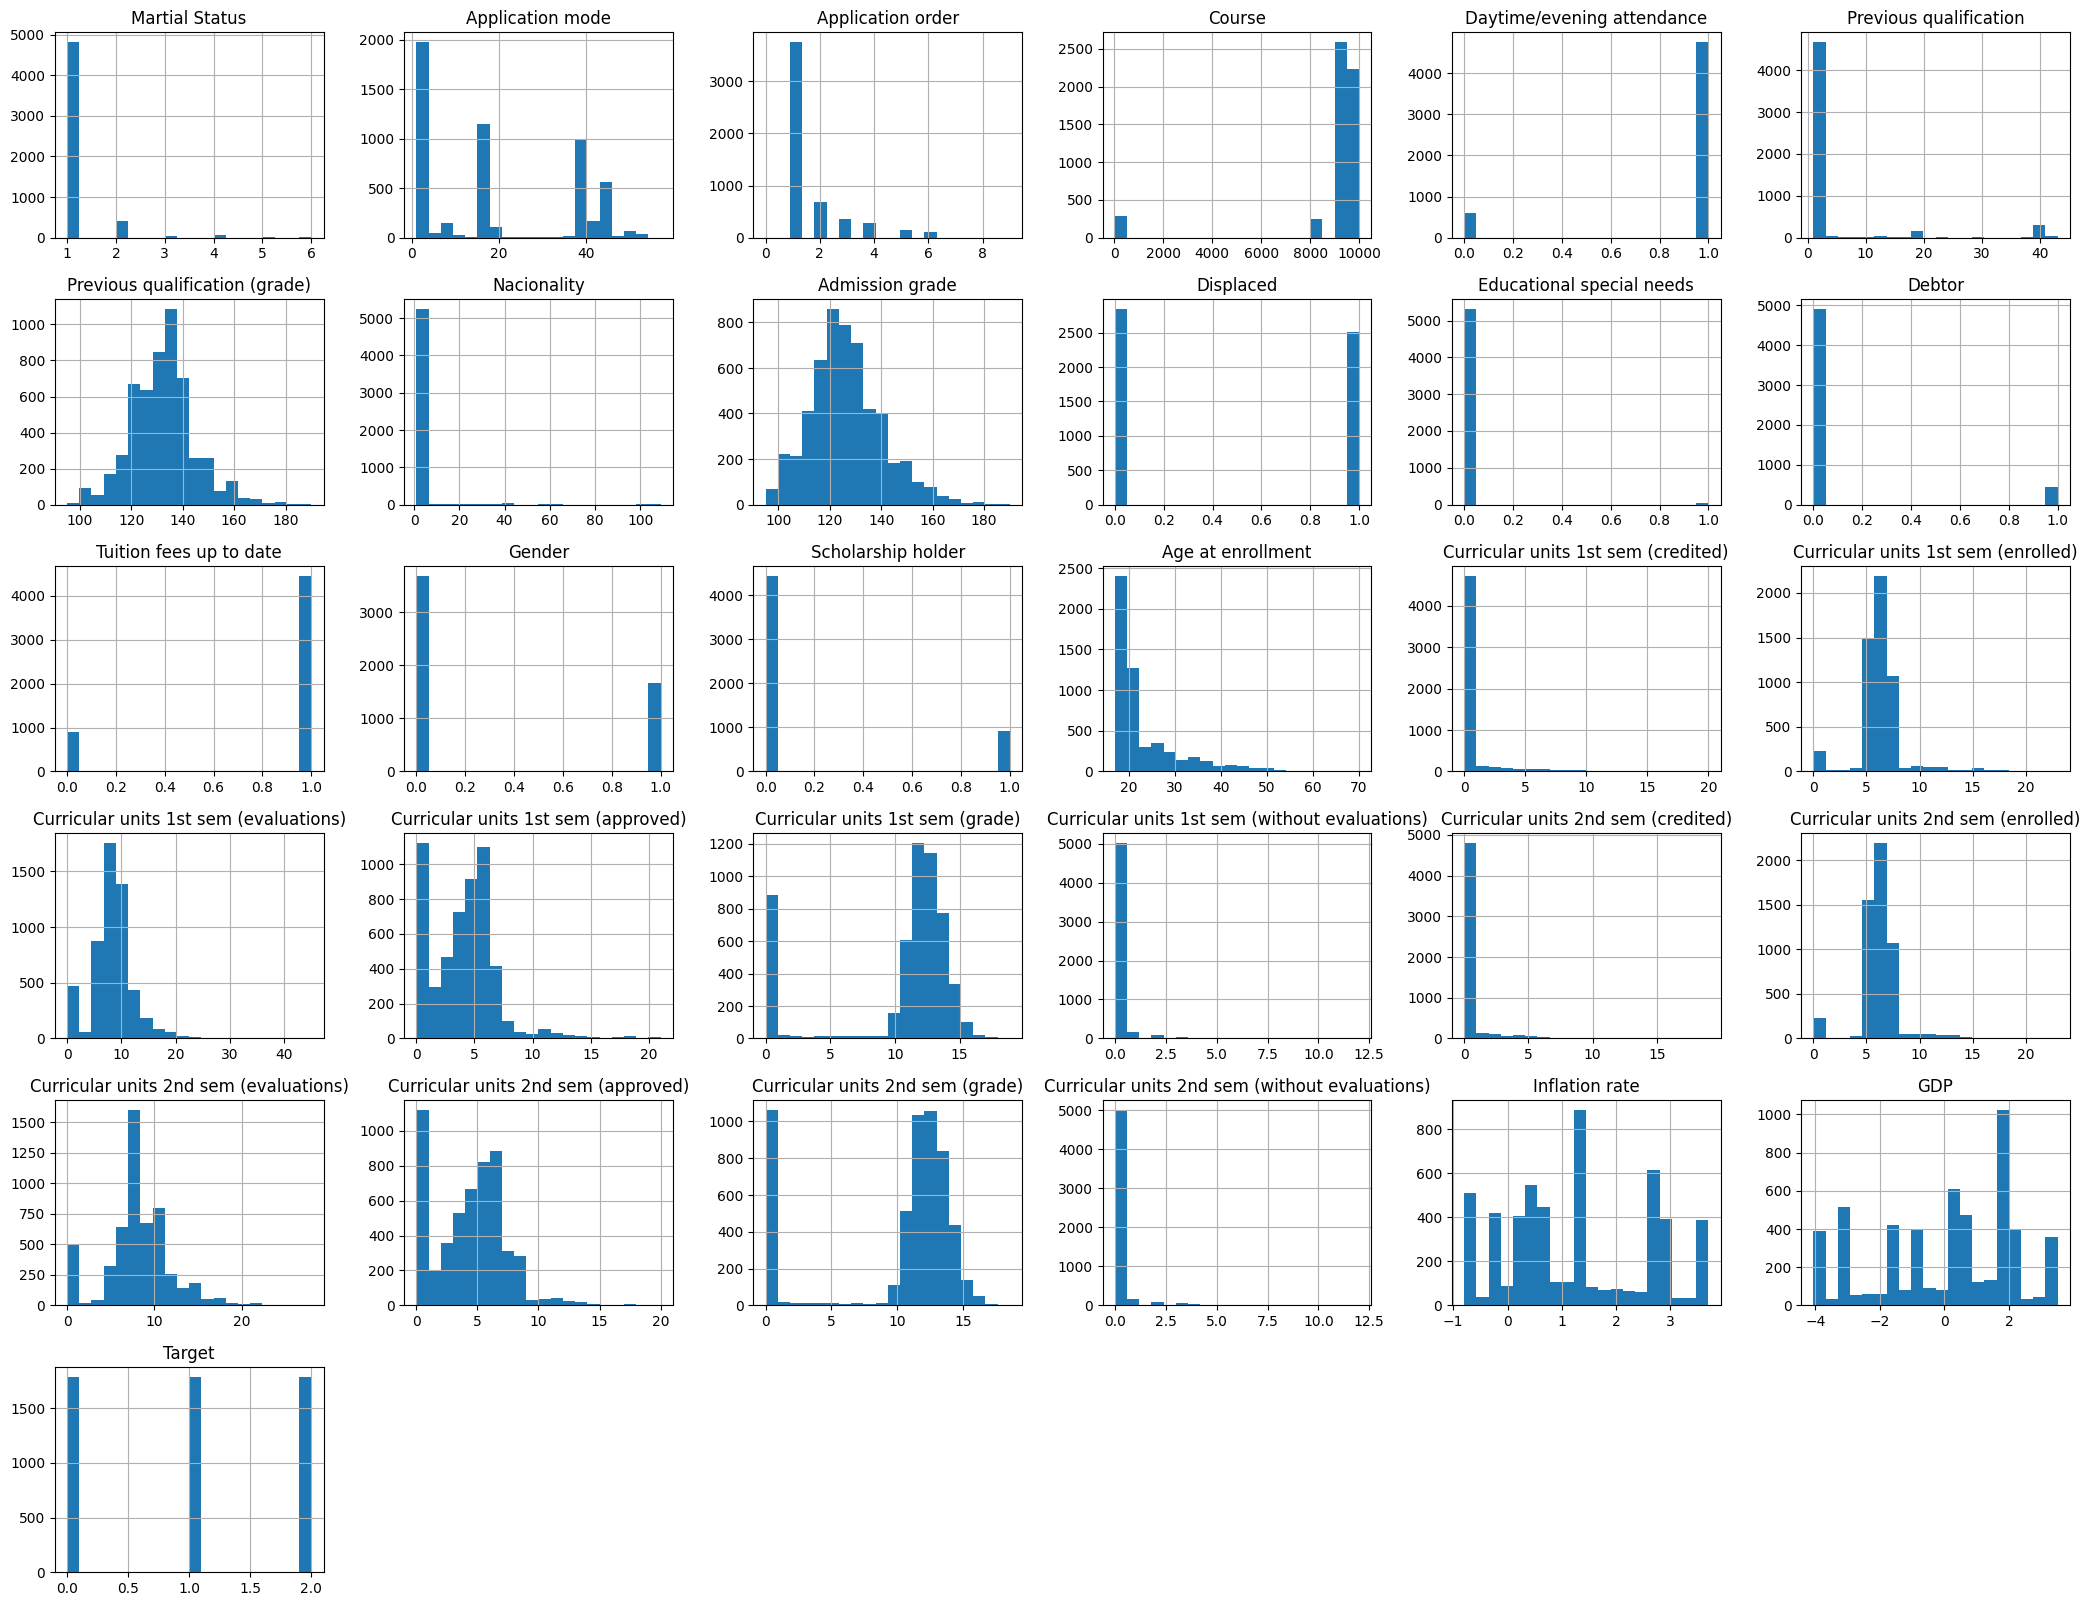

In [62]:
smote_data.hist(figsize=(26,20) ,bins=20);

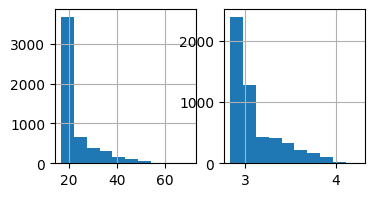

In [63]:
plt.figure(figsize=(4,2))
plt.subplot(1, 2, 1)
smote_data["Age at enrollment"].hist()
plt.subplot(1, 2, 2)
smote_data = np.log(smote_data["Age at enrollment"]).hist()

### Splitting the SMOTE Data

In [64]:
X_smote = data.drop(["Target"], axis=1)
y_smote = data["Target"]

In [65]:
X_smote

,Martial Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Admission grade,Displaced,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,127.3,1,...,0.000000,0,0,0,0,0,0.000000,0,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,142.5,1,...,14.000000,0,0,6,6,6,13.666667,0,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,124.8,1,...,0.000000,0,0,6,0,0,0.000000,0,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,119.6,1,...,13.428571,0,0,6,10,5,12.400000,0,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,141.5,0,...,12.333333,0,0,6,6,6,13.000000,0,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,1,51,1,9991,0,39,120.0,1,118.1,0,...,12.000000,0,9,13,13,9,11.333333,0,1.4,3.51
3536,1,39,1,9991,0,1,110.0,1,139.0,0,...,0.000000,0,0,5,0,0,0.000000,0,3.7,-1.70
3537,1,39,2,9147,1,19,133.1,1,116.3,0,...,0.000000,0,0,5,9,0,0.000000,0,1.4,1.74
3538,1,17,5,9254,1,1,118.0,1,120.5,1,...,12.500000,0,0,6,12,4,10.250000,0,2.6,0.32


In [66]:
y_smote

0       0
1       2
2       0
3       2
4       2
       ..
3535    0
3536    0
3537    0
3538    0
3539    2
Name: Target, Length: 3540, dtype: int64

In [67]:
X_smote_train, X_smote_val, y_smote_train, y_smote_val = train_test_split(X_smote, y_smote, test_size= 0.2495, random_state=42)

### Normalization

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote_train)
X_val_scaled = scaler.transform(X_smote_val)

### Algorithms

### 1. Logistic Regression

In [69]:
log_smote = LogisticRegression()
log_smote.fit(X_train_scaled, y_smote_train)

LogisticRegression()

In [70]:
log_smote.score(X_train_scaled, y_smote_train)

0.7752259036144579

In [71]:
log_smote_pred = log_smote.predict(X_val_scaled)

In [72]:
print(classification_report(y_smote_val,log_smote_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       282
           1       0.48      0.28      0.36       152
           2       0.79      0.94      0.86       450

    accuracy                           0.77       884
   macro avg       0.70      0.66      0.67       884
weighted avg       0.75      0.77      0.76       884



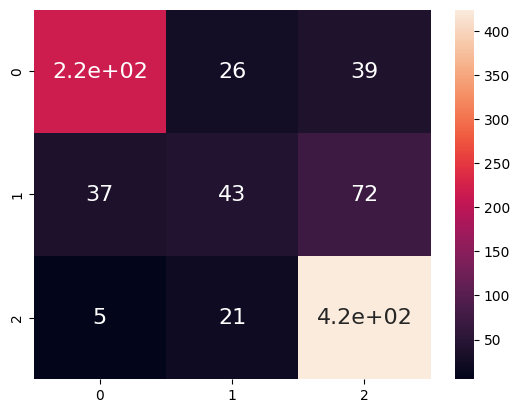

In [73]:
conf_matrix = metrics.confusion_matrix(y_smote_val,log_smote_pred)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

### 2. Decision Tree

In [74]:
DT_smote = DecisionTreeClassifier(max_depth = 7, criterion= "entropy" , random_state = 42)
DT_smote.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [75]:
DT_smote.score(X_smote_train, y_smote_train)

0.8064759036144579

In [76]:
DT_smote_y_pred = DT_smote.predict(X_smote_val)
DT_smote_y_pred

array([2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2,

In [77]:
print(classification_report(y_smote_val,DT_smote_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       282
           1       0.48      0.44      0.46       152
           2       0.79      0.92      0.85       450

    accuracy                           0.76       884
   macro avg       0.72      0.68      0.70       884
weighted avg       0.77      0.76      0.76       884



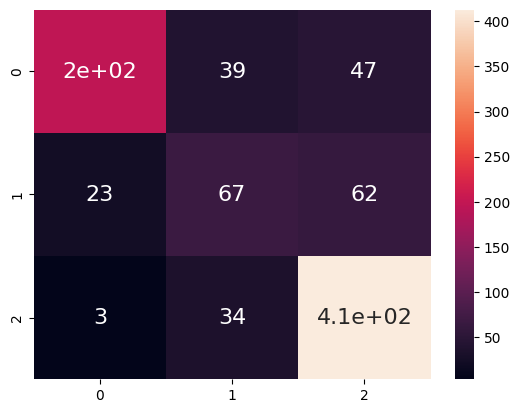

In [78]:
conf_matrix = metrics.confusion_matrix(y_smote_val, DT_smote_y_pred)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

### 3. Random Forest

In [79]:
RF_smote = RandomForestClassifier(max_depth = 9, class_weight= 'balanced', random_state = 0)
RF_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, random_state=0)

In [80]:
RF_smote.score(X_smote_train, y_smote_train)

0.8817771084337349

In [81]:
RF_smote_pred = RF_smote.predict(X_smote_val)
RF_smote_pred

array([2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2,
       0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2,

In [82]:
print(classification_report(y_smote_val,RF_smote_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       282
           1       0.45      0.49      0.47       152
           2       0.83      0.88      0.85       450

    accuracy                           0.76       884
   macro avg       0.71      0.70      0.70       884
weighted avg       0.77      0.76      0.76       884



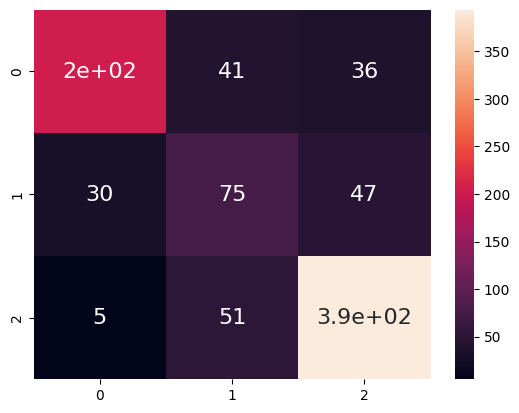

In [83]:
conf_matrix = metrics.confusion_matrix(y_smote_val, RF_smote_pred)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

### 4. SVM
##### we use Gridsearch with SVM to hyperparameters tuning

In [84]:
param_grid = [{'C': [0.0,10.0], 'kernel': ['linear','rbf','poly']}]

svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=3)
grid_search.fit(X_smote_train, y_smote_train)
grid_search.best_params_

{'C': 10.0, 'kernel': 'linear'}

In [85]:
SVM_smote = SVC(C=10.0 ,kernel='linear' ,random_state = 0) 
SVM_smote.fit(X_smote_train, y_smote_train)

SVC(C=10.0, kernel='linear', random_state=0)

In [86]:
SVM_smote.score(X_smote_train, y_smote_train)

0.7669427710843374

In [87]:
SVM_smote_pred = SVM_smote.predict(X_smote_val)
SVM_smote_pred

array([2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2,
       0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2,

In [88]:
print(classification_report(y_smote_val,SVM_smote_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       282
           1       0.45      0.26      0.33       152
           2       0.79      0.92      0.85       450

    accuracy                           0.76       884
   macro avg       0.68      0.65      0.65       884
weighted avg       0.73      0.76      0.74       884



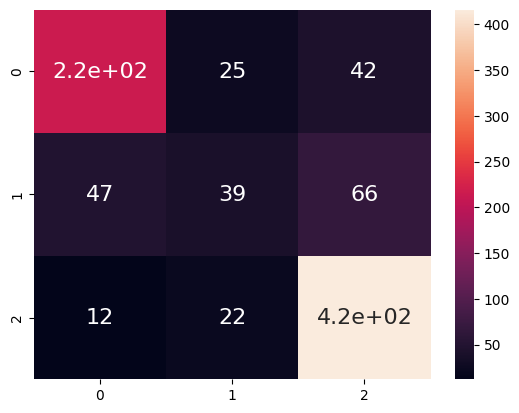

In [89]:
conf_matrix = metrics.confusion_matrix(y_smote_val, SVM_smote_pred)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

### Using ensemble learning techniques

### 1. Bagging with LogisticRegression

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       282
           1       0.48      0.37      0.42       152
           2       0.81      0.89      0.85       450

    accuracy                           0.76       884
   macro avg       0.69      0.67      0.68       884
weighted avg       0.75      0.76      0.75       884



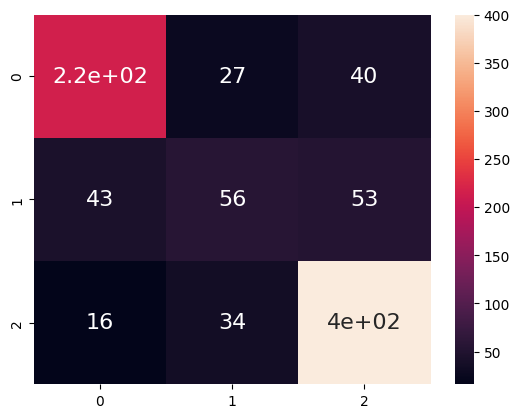

In [90]:
base_clf_lr = DecisionTreeClassifier()
bag_clf_lr = BaggingClassifier(base_estimator = base_clf_lr, random_state = 33)
 
bag_clf_lr.fit(X_smote_train, y_smote_train) 
bag_pred_lr= bag_clf_lr.predict(X_smote_val)
print(classification_report(y_smote_val,bag_pred_lr))

conf_matrix = metrics.confusion_matrix(y_smote_val, bag_pred_lr)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

### 2. Boosting With Random Forest

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       282
           1       0.53      0.29      0.37       152
           2       0.79      0.94      0.86       450

    accuracy                           0.78       884
   macro avg       0.71      0.67      0.68       884
weighted avg       0.76      0.78      0.76       884



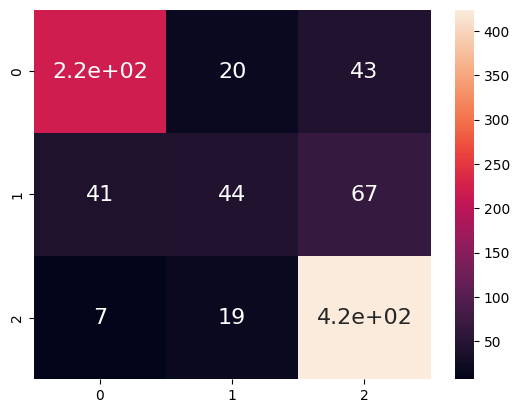

In [91]:
base_clf = RandomForestClassifier()
boost_clf = AdaBoostClassifier(base_estimator = base_clf, random_state = 42)

boost_clf.fit(X_smote_train, y_smote_train) 
boost_pred= boost_clf.predict(X_smote_val)
print(classification_report(y_smote_val,boost_pred))

conf_matrix = metrics.confusion_matrix(y_smote_val, boost_pred)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16})
plt.show()

### submission

In [92]:
X_test_data = pd.read_csv("/kaggle/input/student-academic-success/test.csv",sep=';')

In [93]:
X_test_data = X_test_data.drop(columns=["Unemployment rate","International","Father's occupation","Mother's occupation","Mother's qualification","Father's qualification"])

In [94]:
X_test_data.rename(columns={'Marital status': 'Martial Status', 'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)
X_test_data

,Martial Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Admission grade,Displaced,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Inflation rate,GDP
0,1,17,1,9119,1,1,130.0,1,123.0,0,...,10.000000,0,0,5,7,0,0.000000,0,-0.8,-3.12
1,1,17,1,9670,1,1,132.0,1,122.9,0,...,11.500000,0,0,6,9,2,13.000000,0,1.4,1.74
2,1,39,1,9991,0,1,100.0,1,140.0,0,...,12.250000,0,0,5,7,4,12.750000,0,2.8,-4.06
3,1,17,1,9085,1,1,120.0,1,122.5,0,...,13.600000,0,0,6,11,5,13.666667,0,0.6,2.02
4,1,39,1,9991,0,12,133.1,1,121.5,0,...,10.500000,0,0,5,9,3,11.333333,1,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,1,1,6,9773,1,1,125.0,1,122.2,0,...,13.600000,0,0,6,8,5,12.666667,0,2.8,-4.06
880,1,1,2,9773,1,1,120.0,105,119.0,1,...,12.000000,0,0,6,6,2,11.000000,0,0.6,2.02
881,1,1,1,9500,1,1,154.0,1,149.5,1,...,14.912500,0,0,8,9,1,13.500000,0,-0.3,0.79
882,1,1,1,9147,1,1,180.0,1,153.8,1,...,13.800000,0,0,5,6,5,12.000000,0,-0.8,-3.12


In [95]:
boost_pred = boost_clf.predict(X_test_data)
boost_pred

array([0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1,

In [96]:
submission = pd.read_csv("/kaggle/input/student-academic-success/submission.csv")

In [97]:
submission = submission.rename(columns={'Unnamed: 0': 'ID'})
submission['Target'] = boost_pred

In [98]:
value_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}

In [99]:
submission['Target'] = submission['Target'].replace(value_mapping)

In [100]:
submission.to_csv("submission.csv", index=False)